In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

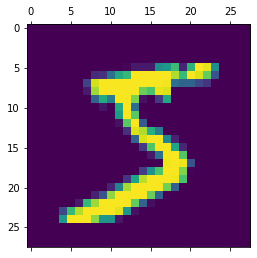

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [8]:
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [9]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model1 = keras.Sequential(
    # To flatten automatically
    # keras.layers.Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)

In [11]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model1.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9257


In [13]:
model1.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.9262


[0.2640458941459656, 0.9261999726295471]

In [14]:
y_predicted = model1.predict(X_test_flatten)
y_predicted

array([[2.87820995e-02, 3.08642797e-07, 5.36197424e-02, ...,
        9.99823332e-01, 1.07406586e-01, 6.96595848e-01],
       [4.83006567e-01, 3.36185098e-03, 9.99606967e-01, ...,
        1.02526342e-12, 1.16705239e-01, 3.39747719e-09],
       [4.65244055e-04, 9.92280602e-01, 6.74923480e-01, ...,
        1.55972362e-01, 3.70931655e-01, 4.31232452e-02],
       ...,
       [4.22981202e-06, 3.08437870e-06, 1.24800205e-03, ...,
        3.00259829e-01, 5.36514819e-01, 8.25251639e-01],
       [1.31964684e-04, 1.39415264e-04, 1.39296055e-04, ...,
        5.44984177e-05, 6.50674760e-01, 1.21852056e-04],
       [1.03653073e-02, 2.45040738e-10, 2.56077588e-01, ...,
        3.43406086e-08, 2.82764435e-04, 1.71364002e-06]], dtype=float32)

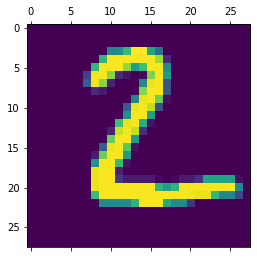

In [15]:
plt.matshow(X_test[1])

In [16]:
print('Predicted: ',np.argmax(y_predicted[1]))
print('Actual: ',y_test[1])

Predicted:  2
Actual:  2


In [17]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    7,  934,   15,    8,    3,   11,   10,   34,    5],
       [   3,    0,   20,  926,    1,   20,    1,   11,   20,    8],
       [   1,    1,    4,    1,  909,    0,   10,    4,    8,   44],
       [  11,    2,    3,   36,   10,  767,   15,    8,   31,    9],
       [  12,    3,    8,    1,    8,   12,  910,    2,    2,    0],
       [   2,    5,   21,    7,    6,    0,    0,  952,    2,   33],
       [   7,    9,    7,   25,    9,   27,    9,   13,  858,   10],
       [  11,    7,    1,   10,   20,    5,    0,   21,    6,  928]])>

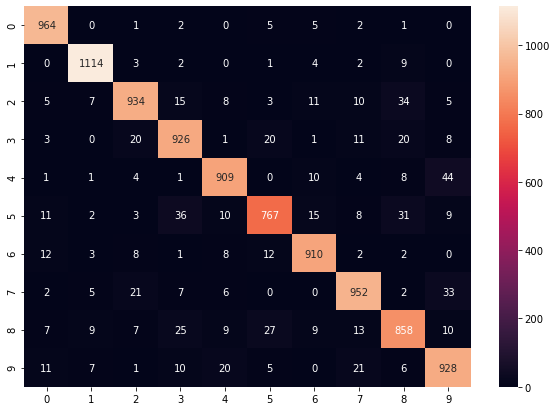

In [19]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')

In [20]:
model2 = keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model2.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4199 - accuracy: 0.8925
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2043 - accuracy: 0.9416
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1552 - accuracy: 0.9555
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9643
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1016 - accuracy: 0.9711


In [23]:
y_predicted = model1.predict(X_test_flatten)

In [24]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

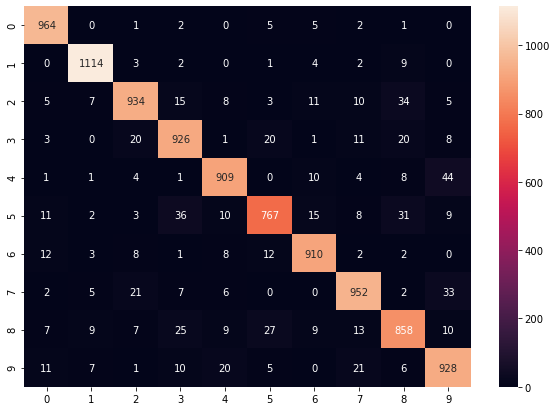

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')

In [26]:
model3 = keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1242 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9849


In [27]:
y_predicted = model1.predict(X_test_flatten)

In [28]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

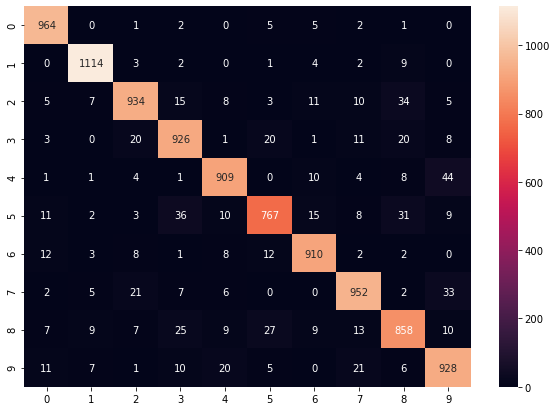

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')